<a href="https://colab.research.google.com/github/JungyuBaeck/Jungyu-astron1221/blob/main/Gravitational_Wave_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
! pip install gwpy # install the gwpy package

The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [116]:
# # -- Set a GPS time:
t0 = 1186741861.5    # -- GW170814

from gwpy.timeseries import TimeSeries # Importing time series from gwpy.timeseries
hdata = TimeSeries.fetch_open_data('H1', 1186741855.5	, 1186741877.5	) #derive GPS timestamps that define the start and end times

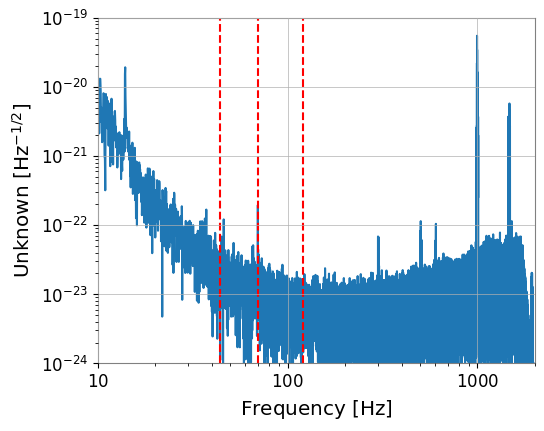

In [117]:
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd().plot()
plt.xlim(10,2000) # plot limit between10-2000
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax) # set y limit
plt.vlines(44, ymin, ymax, linestyle="dashed", color="red") #vertical line on x=60
plt.vlines(70, ymin, ymax, linestyle="dashed", color="red")#vertical line on x=120
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") #vertical line on x=180
plt.show()

In [118]:
from gwpy.signal import filter_design #designing and applying filters to the gravitational-wave data
bp = filter_design.bandpass(50, 120, hdata.sample_rate)# Creating a Bandpass Filter to remove both low and high frequency content

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (44, 70, 120)] #store frequencies 44 Hz, 70 Hz, and 120 Hz, creating a notch filter for each.

zpk = filter_design.concatenate_zpks(bp, *notches) # combining filters bp and notches

hfilt = hdata.filter(zpk, filtfilt=True) # define hfilt as a combined filters


In [119]:
hdata = hdata.crop(*hdata.span.contract(1)) # discard returning infinite impulse response filters by default,
hfilt = hfilt.crop(*hfilt.span.contract(1)) # discard returning infinite impulse response filters by default,

In [120]:
print(*hdata.span.contract(1)) # print in

1186741857.5 1186741875.5


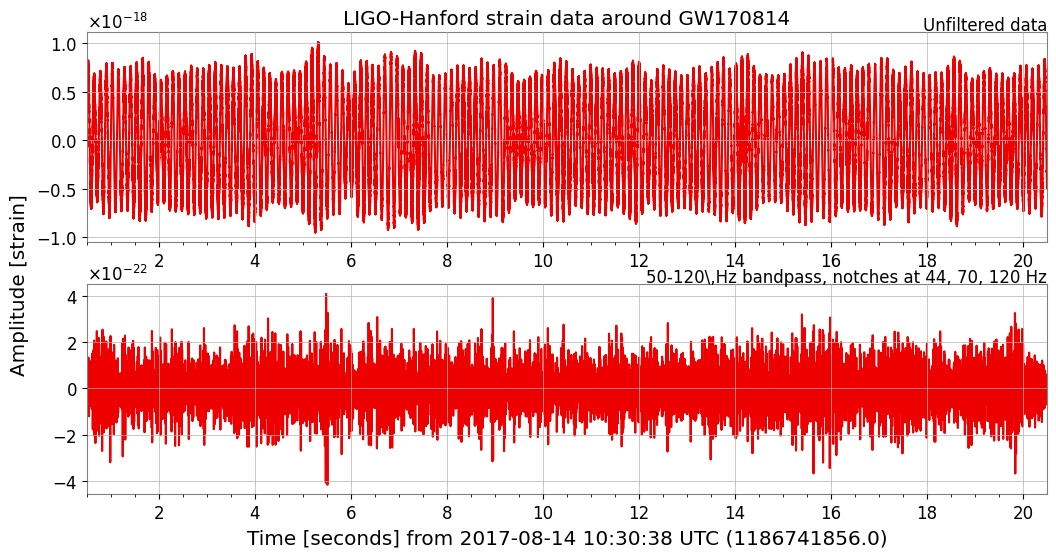

In [121]:
from gwpy.plot import Plot
#print the original and filtered data
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW170814')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-120\,Hz bandpass, notches at 44, 70, 120 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

Now using functions in matlibplot to plot without using gwpy

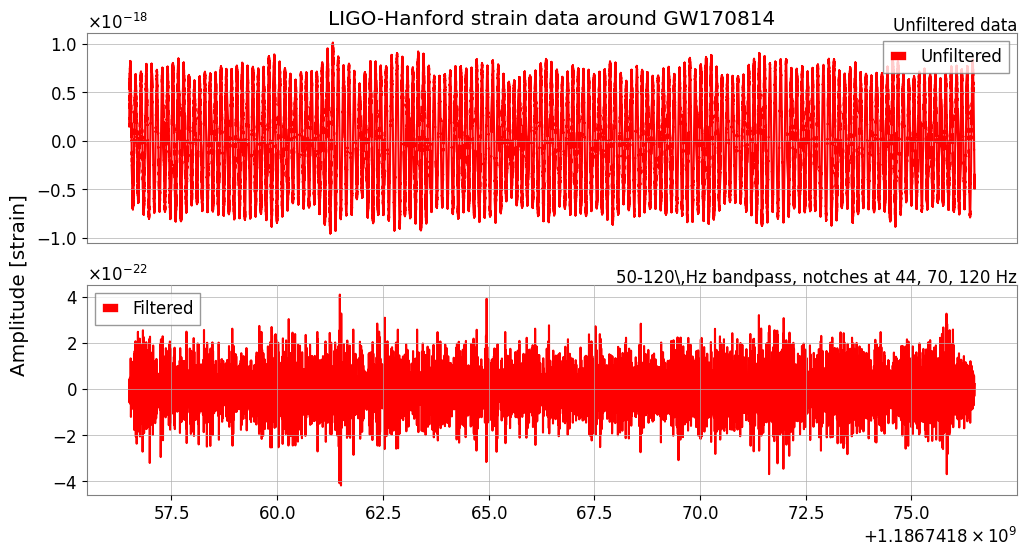

In [122]:
plt.figure(figsize=[12, 6])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered")
plt.legend()
ax1.set_title('LIGO-Hanford strain data around GW170814')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.xaxis.set_visible(False)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered")
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-120\,Hz bandpass, notches at 44, 70, 120 Hz',
         transform=ax2.transAxes, ha='right')
plt.legend()


In [123]:
hdata.value

array([ 1.66604631e-19,  1.45071783e-19,  1.87132362e-19, ...,
       -4.86717104e-19, -4.95265074e-19, -4.87876960e-19])

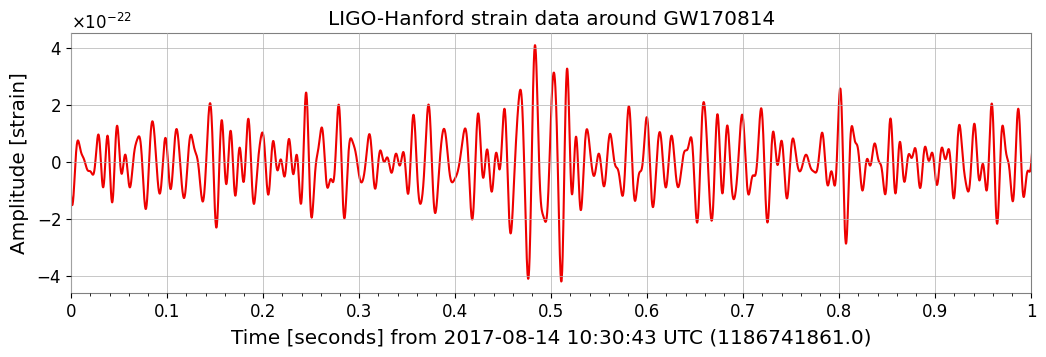

In [124]:
import matplotlib.pyplot as plt
#zoom in the data at 5
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW170814')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(1186741861.0, 1186741862)
ax.set_xscale('seconds', epoch=1186741861.0)
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [125]:
ldata = TimeSeries.fetch_open_data('L1', 1186741850.5	, 1186741872.5)# load the new data
lfilt = ldata.filter(zpk, filtfilt=True)

In [126]:
lfilt.shift('6.9ms') #correct the detected signal and invert the data
lfilt *= -1

In [127]:
print(0.0069 * 3e8)

2070000.0


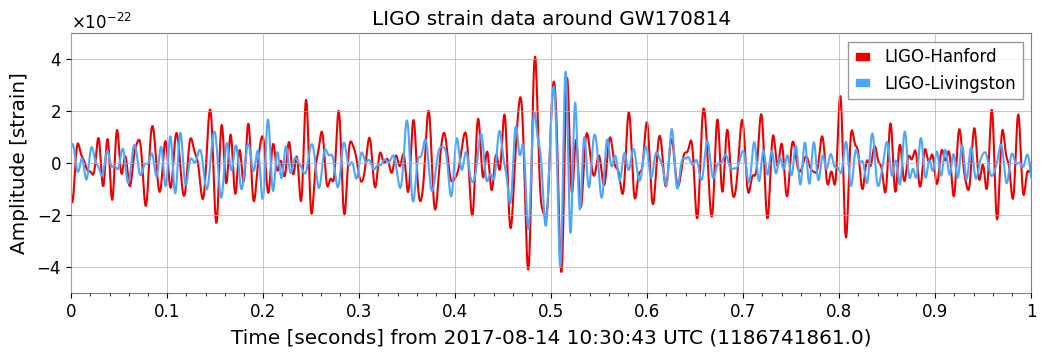

In [128]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW170814')
ax.set_xlim(1186741861.0, 1186741862)
ax.set_xscale('seconds', epoch=1186741861.0)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-0.5e-21, 0.5e-21)
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

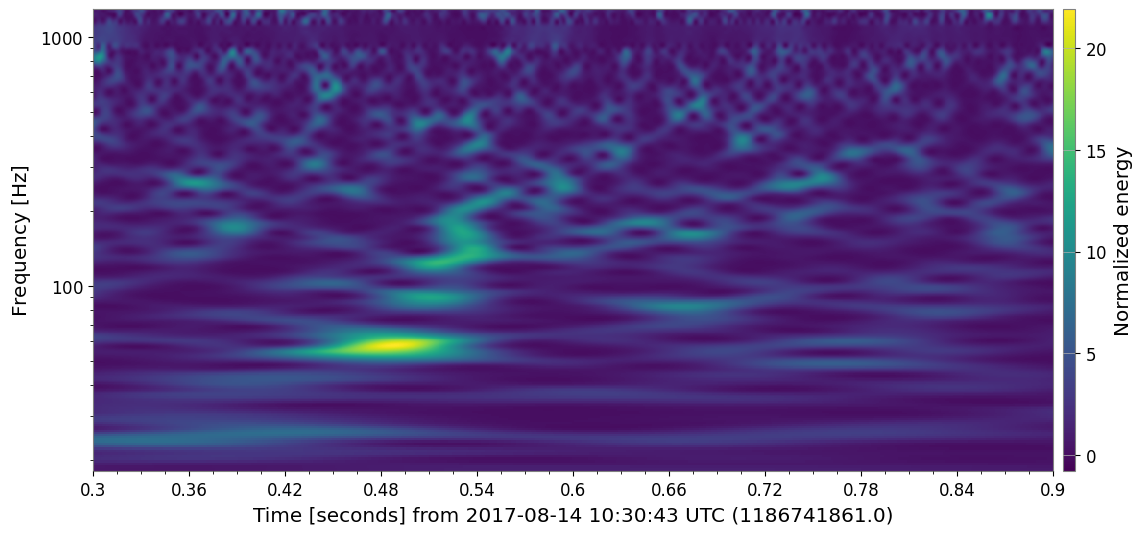

In [129]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.4))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [130]:
from scipy.io.wavfile import write # for wave audio file
import numpy as np

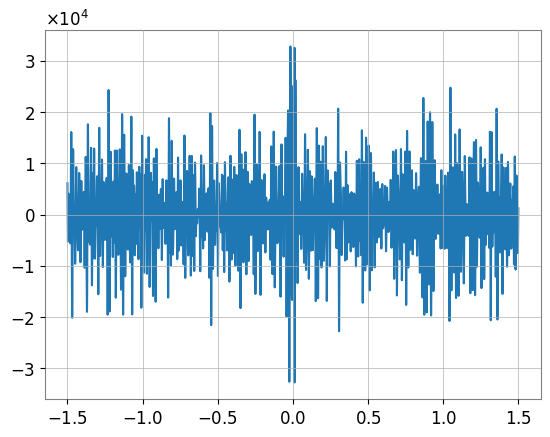

In [131]:
amplitude = np.iinfo(np.int16).max #determines the maximum value that can be represented by a 16-bit integer data type

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) #finds the indices of the elements in the x_val array that fall within a specific time range.
y = y_val[ind]
# y = y**3
y = y / np.max(y) #normalizes the y values by dividing them by the maximum value in the y array.
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) # make plot

In [132]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # Calculating the Sampling Frequency
print("fs = ", fs) # print fs
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) # Writing the Audio Data to a WAV file

fs =  4096


In [133]:
from google.colab import files
files.download("example.wav") #download the audio file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>